## 1. Planejamento  

 - Verificar a correlação entre os tipos de  delitos e suas incidencias
 - Fazer previsões do crescimento de determinados tipos de delitos
 - Relacionar com cresccimento da população

 ## 2. Importando e praparando a basse de dados

In [1]:
#  importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- importando os dados dos delitos

 link para base de dados original: (https://www.kaggle.com/adamschroeder/crimes-new-york-city?select=Crime_Column_Description.csv)

In [2]:
delitos_ny = pd.read_csv('select_ny.csv')

In [3]:
delitos_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,0 days 00:05:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER
1,2015-12-31,2015-12-31,2015-12-31,23:18:00,23:25:00,0 days 00:07:00.000000000,FELONY ASSAULT,nao_concluido,crime,N.Y. POLICE DEPT,BROOKLYN,em_frente,DRUG STORE
2,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:15:00,0 days 00:00:00.000000000,DANGEROUS WEAPONS,concluido,crime,N.Y. POLICE DEPT,BRONX,em_frente,STREET
3,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:30:00,0 days 00:15:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:10:00,23:10:00,0 days 00:00:00.000000000,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,dentro,DRUG STORE


 - convertendo as colunas data para Datetime

In [4]:
delitos_ny['data_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_da_ocorrencia'])

In [5]:
delitos_ny['data_final_da_ocorrencia'] = pd.to_datetime(delitos_ny['data_final_da_ocorrencia'])

In [6]:
delitos_ny['data_comunicacao_policia'] = pd.to_datetime(delitos_ny['data_comunicacao_policia'])

 - pegando apenas os delitos concluídos nos anos 2014 e 2015

In [7]:
delitos_ny = delitos_ny.query('conclusao == "concluido" and data_da_ocorrencia >= "2014-01-01"')

In [8]:
delitos_ny['data_da_ocorrencia'].dt.year.value_counts()

2014    303854
2015    294305
Name: data_da_ocorrencia, dtype: int64

 - Classificando os delitos apenas como centro ou fora dos estabelecimentos 

In [9]:
#  classificando os delitos apenas como sendo dentro / fora  dos estabelecimentos


new_local_da_ocorrencia = {'atras': "fora", 'dentro': "dentro", 'em_frente': "fora", 
                           'oposto': "fora" }
delitos_ny['local_da_ocorrencia'] = delitos_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

In [10]:
delitos_ny.local_da_ocorrencia.value_counts()

dentro    387272
fora      210887
Name: local_da_ocorrencia, dtype: int64

 -  Importando os dados da população de 2010-2030

In [11]:
populacao = pd.read_csv('populacao_2010-2020.csv')

In [12]:
populacao

,Age Group,Borough,2010,2010 - Boro share of NYC total,2020,2020 - Boro share of NYC total,2030,2030 - Boro share of NYC total
0,Total Population,NYC Total,"8,242,624",100%,"8,550,971",100%,"8,821,027",100%
1,Total Population,Bronx,"1,385,108",16.8%,"1,446,788",16.92%,"1,518,998",17.22%
2,Total Population,Brooklyn,"2,552,911",30.97%,"2,648,452",30.97%,"2,754,009",31.22%
3,Total Population,Manhattan,"1,585,873",19.24%,"1,638,281",19.16%,"1,676,720",19.01%
4,Total Population,Queens,"2,250,002",27.3%,"2,330,295",27.25%,"2,373,551",26.91%
5,Total Population,Staten Island,"468,730",5.69%,"487,155",5.7%,"497,749",5.64%


 - Tratando os dados do DataFrame "populacao"

In [13]:
#  renomenando as colunas e apagando a coluna que não pe necesssária
populacao = populacao.drop(columns = ['Age Group'])
populacao.columns = ['Bairro','Total_poplacao_2010', '%Populacao_2010', 'Total_poplacao_2020', '%Populacao_2020'
                    ,'Total_poplacao_2030', '%Populacao_2030']

In [14]:
populacao=populacao.drop(columns=['%Populacao_2010','%Populacao_2020','%Populacao_2030'])

In [15]:
populacao

,Bairro,Total_poplacao_2010,Total_poplacao_2020,Total_poplacao_2030
0,NYC Total,"8,242,624","8,550,971","8,821,027"
1,Bronx,"1,385,108","1,446,788","1,518,998"
2,Brooklyn,"2,552,911","2,648,452","2,754,009"
3,Manhattan,"1,585,873","1,638,281","1,676,720"
4,Queens,"2,250,002","2,330,295","2,373,551"
5,Staten Island,"468,730","487,155","497,749"


 - Retirando as vírgulas dos números e convertendo as colunas pra um formato numérico

In [18]:
lista_cols=['Total_poplacao_2010','Total_poplacao_2020','Total_poplacao_2030']

for i in lista_cols:
    populacao[i]=populacao[i].astype(str)
    populacao[i]=populacao[i].str.replace(",","")
    populacao[i]=pd.to_numeric(populacao[i])

In [40]:
populacao=populacao.set_index('Bairro')

In [20]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Bairro               6 non-null      object
 1   Total_poplacao_2010  6 non-null      int64 
 2   Total_poplacao_2020  6 non-null      int64 
 3   Total_poplacao_2030  6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


 ## 3. Análise exploratória de dados

In [ ]:
delitos_ny.describe().T

In [22]:
populacao.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_poplacao_2010,6.0,2.747541e+06,2.788549e+06,468730.0,1435299.25,1917937.5,2477183.75,8242624.0
Total_poplacao_2020,6.0,2.850324e+06,2.892476e+06,487155.0,1494661.25,1984288.0,2568912.75,8550971.0
Total_poplacao_2030,6.0,2.940342e+06,2.984012e+06,497749.0,1558428.50,2025135.5,2658894.50,8821027.0


In [38]:
sns.barplot(x = 'Bairro' , y = populacao['Total_poplacao_2010','Total_poplacao_2020','Total_poplacao_2030'],data=populacao)

KeyError: ('Total_poplacao_2010', 'Total_poplacao_2020', 'Total_poplacao_2030')

Text(0, 0.5, 'populacao')

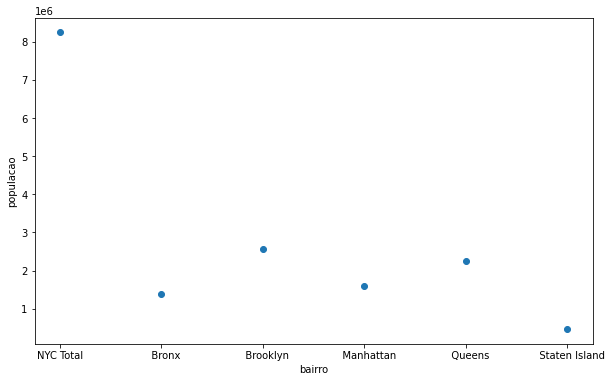

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(populacao['Bairro'], populacao['Total_poplacao_2010'],alpha=1)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('bairro')
plt.ylabel('populacao')

Text(0.5, 1.0, 'Crescimento da População de Nova York por bairro')

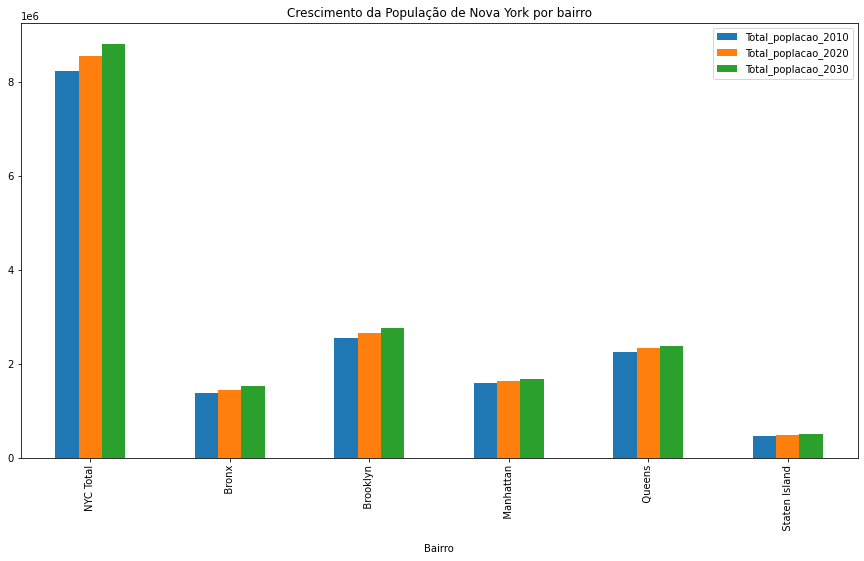

In [50]:
# plt.figure()
populacao.plot.bar(figsize=(15, 8))
titulo='Crescimento da População de Nova York por bairro'
plt.title(titulo)


### 1-  Nivel de ofensa
  
  - contravenção
  - crime
  - violação

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171DC41F700>,
      dtype=object)

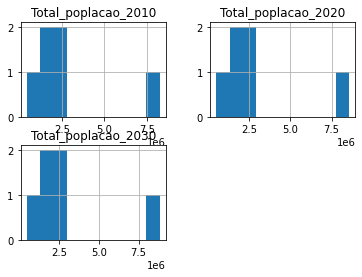

In [30]:
s()

In [52]:
delitos_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,0 days 00:05:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,fora,OTHER
2,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:15:00,0 days 00:00:00.000000000,DANGEROUS WEAPONS,concluido,crime,N.Y. POLICE DEPT,BRONX,fora,STREET
3,2015-12-31,2015-12-31,2015-12-31,23:15:00,23:30:00,0 days 00:15:00.000000000,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,RESIDENCE - APT. HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:10:00,23:10:00,0 days 00:00:00.000000000,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,dentro,DRUG STORE
5,2015-12-31,2015-12-31,2015-12-31,23:05:00,23:15:00,0 days 00:10:00.000000000,PETIT LARCENY,concluido,contravencao,N.Y. POLICE DEPT,BRONX,dentro,FAST FOOD


In [56]:
nivel_de_ofensa=delitos_ny.loc[:,['data_da_ocorrencia','nivel_de_ofensa']].set_index('data_da_ocorrencia')

In [57]:
nivel_de_ofensa.head()

,nivel_de_ofensa
data_da_ocorrencia,
2015-12-31,contravencao
2015-12-31,crime
2015-12-31,contravencao
2015-12-31,contravencao
2015-12-31,contravencao


In [59]:
nivel_de_ofensa=pd.get_dummies(nivel_de_ofensa)

In [ ]:
nivel_de_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.nivel_de_ofensa ).reset_index()

In [ ]:
nivel_de_ofensa.head()

In [63]:
nivel_de_ofensa.describe()

,nivel_de_ofensa_contravencao,nivel_de_ofensa_crime,nivel_de_ofensa_violacao
count,598159.000000,598159.000000,598159.000000
mean,0.552315,0.310252,0.137433
std,0.497256,0.462597,0.344305
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [66]:
nivel_de_ofensa.corr()

,nivel_de_ofensa_contravencao,nivel_de_ofensa_crime,nivel_de_ofensa_violacao
nivel_de_ofensa_contravencao,1.000000,-0.744936,-0.443360
nivel_de_ofensa_crime,-0.744936,1.000000,-0.267708
nivel_de_ofensa_violacao,-0.443360,-0.267708,1.000000


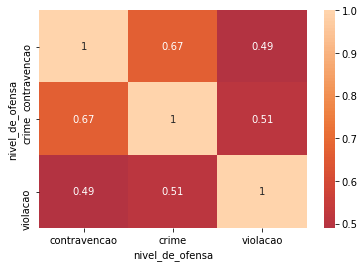

In [76]:
sns.heatmap(nivel_de_ofensa_geral.corr(), center = 0, annot=True)

 - Visualizando a distibuição dos delitos classificados como crime, contravenção e violação, nos anos de 2014 e 2015.

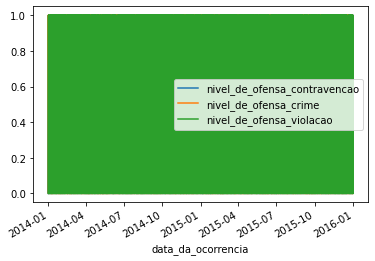

In [73]:
nivel_de_ofensa.plot()

KeyError: 'data_da_ocorrencia'

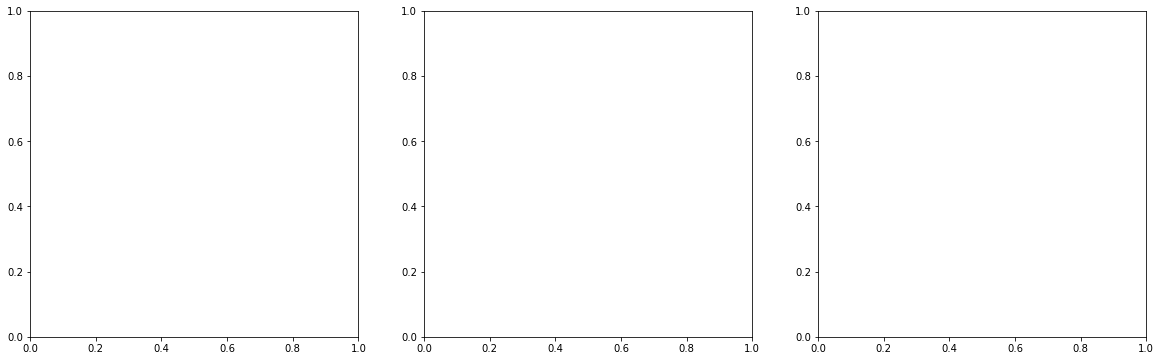

In [65]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='contravencao',kind='hist',ax=ax[0],title='contravencao');
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='crime',kind='count',ax=ax[1],title='crime');
nivel_de_ofensa.plot(x='data_da_ocorrencia',y='violacao',kind='count',ax=ax[2],title='violacao');
plt.tight_layout();

 - criando novo DataFrame colocando a data como índice

In [74]:
nivel_de_ofensa_geral = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.nivel_de_ofensa )

In [75]:
nivel_de_ofensa_geral.head()

nivel_de_ofensa,contravencao,crime,violacao
data_da_ocorrencia,,,
2014-01-01,855,416,153
2014-01-02,415,231,83
2014-01-03,341,201,101
2014-01-04,396,208,83
2014-01-05,390,201,86


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(nivel_de_ofensa_geral)
plt.xlabel('Data', fontsize=20)
plt.ylabel('Quantidade', fontsize=20)
legenda = ['contravenção','crime', 'violação']
plt.legend(legenda, fontsize=15)
plt.show()

 ### 2- Bairro

In [ ]:
qtde_ocorrencia_dia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.bairro)

In [ ]:
qtde_ocorrencia_dia.head()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(qtde_ocorrencia_dia)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda = ['BRONX','BROOKLYN', 'MANHATTAN','QUEENS','STATEN ISLAND']
plt.legend(legenda, fontsize=10,loc=1)
plt.title('QUANTIDADE DE DELITOS PRATICADOS POR DIA EM CADA BAIRRO', fontsize=12)
plt.show()

### 3-  Local da ocorrencia

In [ ]:
local_da_ocorrencia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.local_da_ocorrencia).reset_index()

In [ ]:
local_da_ocorrencia.info()

In [ ]:
local_da_ocorrencia.head()

In [ ]:
#  classificando os delitos apenas como sendo dentro / fora  dos estabelecimentos


new_local_da_ocorrencia = {'atras': "fora", 'dentro': "dentro", 'em_frente': "fora", 
                           'oposto': "fora" }
delitos_ny['local_da_ocorrencia'] = delitos_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

In [ ]:
delitos_ny.local_da_ocorrencia.value_counts()

In [ ]:
local_da_ocorrencia = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.local_da_ocorrencia)
local_da_ocorrencia.head()

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(local_da_ocorrencia)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda = ['dentro','fora']
plt.title(' DELITOS PRATICADOS DENTRO X FORA DOS ESTABELECIMENTOS', fontsize=12)
plt.legend(legenda, fontsize=15)
plt.show()

In [ ]:
# sns.set_palette('Accent')
# sns.set_style('darkgrid')
# ax=sns.lineplot(x='data_da_ocorrencia', y='dentro', data = local_da_ocorrencia)
# ax.figure.set_size_inches(14,7)
# ax.set_title('Delitos praticados dentro dos estabelecimentos', loc='left', fontsize=18)
# ax.set_xlabel('Data dos delitos', fontsize=14)
# ax.set_ylabel('Quatidade de delitos', fontsize=14)
# ax=ax

### 4 -  Descrição da ofensa

 - criando um dataframe data x descrição dos delitos

In [ ]:
descricao_da_ofensa = pd.crosstab(delitos_ny.data_da_ocorrencia , delitos_ny.descricao_da_ofensa)

In [ ]:
descricao_da_ofensa.head()

- separando os delitos em :
 - delitos com maiores ocorrencias
 - delitos mais graves

### 4.1 Tipos de delitos mais frequentes

In [ ]:
delitos_ny.descricao_da_ofensa.value_counts().head()

In [ ]:
delitos_mais_frequentes = descricao_da_ofensa.loc[:,['PETIT LARCENY','HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES',
                                                     'CRIMINAL MISCHIEF & RELATED OF','GRAND LARCENY']]

In [ ]:
delitos_mais_frequentes.head()

In [ ]:
# plt.figure(figsize=(20,10))
# plt.plot(delitos_mais_frequentes)
# plt.xlabel('Data', fontsize=12)
# plt.ylabel('Quantidade', fontsize=12)
# legenda = ['PETIT LARCENY','HARRASSMENT 2', 'ASSAULT 3 & RELATED OFFENSES','CRIMINAL MISCHIEF & RELATED OF','GRAND LARCENY']
# plt.title('TIPOS DE DELITOS MAIS FREQUENTES', fontsize=12)
# plt.legend(legenda, fontsize=15)
# plt.show()

### 4.2 Delitos mais graves

In [ ]:
# delitos_ny.descricao_da_ofensa.value_counts().head(40)

In [ ]:
# 'HARRASSMENT 2','FELONY ASSAULT','DANGEROUS DRUGS','SEX CRIMES','DANGEROUS WEAPONS'

In [ ]:
delitos_mais_graves = descricao_da_ofensa.loc[:,['FELONY ASSAULT','DANGEROUS DRUGS',
                                                 'SEX CRIMES','DANGEROUS WEAPONS']]

In [ ]:
delitos_mais_graves.columns = ['crime_de_assalto','drogas_perigosas','crimes_sexuais','armas_perigosas']

In [ ]:
delitos_mais_graves.head()

In [ ]:
# plt.figure(figsize=(18,10))
# plt.plot(delitos_mais_graves)
# plt.xlabel('Data', fontsize=12)
# plt.ylabel('Quantidade', fontsize=12)
# legenda = ['crime_de_assalto','drogas_perigosas','crimes_sexuais','armas_perigosas']
# plt.title('TIPOS DE DELITOS MAIS graves', fontsize=12)
# plt.legend(legenda, fontsize=15, loc=1)
# plt.show()

 ## Selecionando a variável "crimes_sexuais" e observando seu comportamento ao longo do tempo

 - Crimes sexuais x tempo

In [ ]:
delitos_mais_graves.head()

In [ ]:
# plt.figure(figsize=(15,8))
# delitos_mais_graves.crimes_sexuais.plot()
# plt.xticks(rotation=45)
# plt.xlabel('Data')
# plt.ylabel('Quantidade')
# plt.tight_layout()

 - Criando o DataFrame "crimes_sexuais"

In [ ]:
crimes_sexuais = delitos_mais_graves.crimes_sexuais.to_frame()

 - Criando o arquivo CSV crimes_sexuais

In [ ]:
crimes_sexuais.to_csv('crimes_sexuais.csv', encoding = 'latin-1' )

 - Graficando "crimes_sexuais"

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(crimes_sexuais)
plt.title('Crimes Sexuais', fontsize=12)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
legenda= ['Crimes sexuais x Tempo']
plt.legend(legenda, fontsize=15, loc=1)
plt.show()

## Fazendo a decomposição sazonal

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose(crimes_sexuais, period=12)

 - obtendo os componentes

In [ ]:
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuo = resultado.resid

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(tendencia)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Tendencia')

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(sazonalidade)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Sazonalidade')

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(residuo)
plt.xlabel('Data')
plt.ylabel('crimes_sexuais')
plt.title('Resíduo')
